In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
advertising = pd.read_csv('./Advertising1.csv', usecols=[1,2,3,4])
display(advertising)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
advertising.shape

(200, 4)

In [8]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
(advertising == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

In [14]:
advertising.Sales.value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

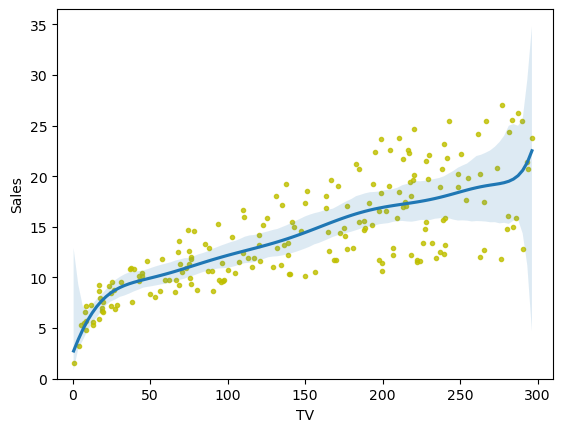

In [46]:
sns.regplot(x=advertising.TV, y=advertising.Sales, order=10, ci=99, scatter_kws={'color':'y', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

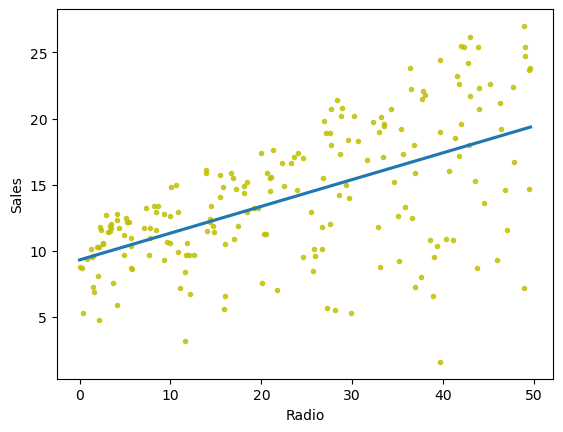

In [57]:
sns.regplot(x=advertising.Radio, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'y', 's':9})
plt.show()

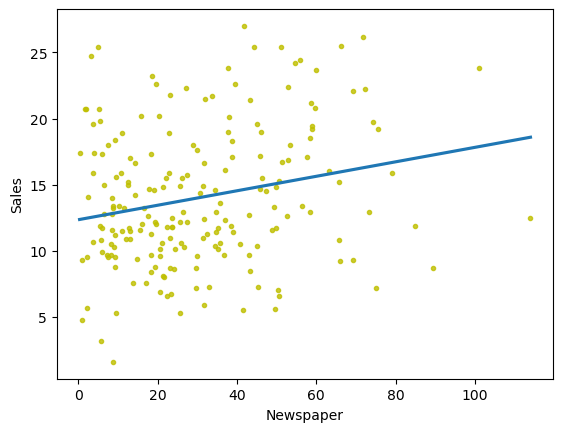

In [56]:
sns.regplot(x=advertising.Newspaper, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'y', 's':9})
plt.show()

In [66]:
import sklearn.linear_model as skl_lm
regr = skl_lm.LinearRegression()
x = advertising.TV.values.reshape(-1,1)
y = advertising.Sales
regr.fit(x, y)
regr.intercept_

7.032593549127693

In [72]:
min_rss=np.sum((regr.intercept_+regr.coef_*x - y.values.reshape(-1,1))**2)
display(min_rss)
mse = min_rss / len(y)
display(mse)

2102.5305831313512

10.512652915656757

In [75]:
from sklearn.metrics import mean_squared_error, r2_score

sales_pred = regr.predict(x)
display(r2_score(y,sales_pred))
display(mean_squared_error(y, sales_pred))

0.611875050850071

10.512652915656757

In [78]:
import statsmodels.formula.api as smf
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 31 Jan 2024   Prob (F-statistic):           1.47e-42
Time:                        10:58:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
est.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [80]:
((advertising.Sales - (est.params[0] + est.params[1] * advertising.TV)) **2 ).sum()

2102.5305831313512

In [82]:
est = smf.ols('Sales ~ Radio', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [83]:
est = smf.ols('Sales ~ Newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


In [84]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
display(est.summary().tables[1])

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011
